<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Ice-age dynamics: 2. Geomorphology
## Random numbers and distributions
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we discuss some realisation of generating random numbers, creating distributions, and plotting these data.

As a first step, we import the `numpy` and the `matplotlib` library to be generally available.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets

## Statistics

We define a set of $n$ *real numbers* as model vector $x_i$:
$$
x_i = (x_1,x_2,\dots,x_n)^T, \quad i=1,n
$$

If we want to describe the likelihood that a certain number is taken out of the entire set, and
we assume that the chance to draw a certain number is equal for all numbers, we can define the
**probability** as
$$
p_i = {{1} \over{n}}, \quad i=1,n
$$

We then define the **arithmetic mean** of the distribution as:
$$
\bar{x} = \sum\limits_{i} x_i p_i = {{1} \over{n}} \sum\limits_{i} x_i
$$

The **variance** of the distribution is:
$$
var(x) = \sigma^2 = {{1} \over{n}} \sum\limits_{i}  (x_i - \bar{x})^2
$$

Finally, the **standard deviation** is defined as:
$$
\sigma = \sqrt{var(x)}
$$

*Skewness* and *kurtosis*, ...

Let's play a bit with `python`: We define an array of eleven integer numbers, then
check the type of the array and the type of a number:

In [2]:
# define an array of numbers
x = np.array([1,2,3,4.,5,6,7,8,9,10,11],dtype='int')
print('x     ',type(x))
print('x[0]: ',type(x[0]))
print(x)

x      <class 'numpy.ndarray'>
x[0]:  <class 'numpy.int64'>
[ 1  2  3  4  5  6  7  8  9 10 11]


Check the type of the array, it is `int64`. Thus, `python` has realized that only integer numbers
have been used in the array.

- But change **one** number to float ...
- and then force them to be integer again with `dytpe="int"`.

Next, we calculate mean and standard deviation by ourselves...

In [3]:
# MEAN our way
mean1 = 0
for i in range(len(x)):
    mean1 = mean1 + x[i]
mean1 = mean1 / len(x)
print ('mean1:  ',mean1)

# STANDARD DEVIATION our way
sigma1 = 0
for i in range(len(x)):
    sigma1 = sigma1 + (x[i]-mean1)**2
sigma1 = sigma1 / (len(x))
if (sigma1 != 0):
    sigma1 = np.sqrt(sigma1)
print ('sigma1: ',sigma1)

mean1:   6.0
sigma1:  3.1622776601683795


... and the `python` way:

In [4]:
# MEAN python way
mean2 = x.mean()
print ('mean2:  ',mean2)

# STANDARD DEVIATION python way
sigma2 = x.std()
print ('sigma2: ',sigma2)

mean2:   6.0
sigma2:  3.1622776601683795


## Random numbers

Now we can move on to look at `random numbers`.
We first draw a single random number from a uniform distribution. $x \in [0,1[$.

In [5]:
x1 = np.random.random(1)
print(x1)

[0.44450186]


Repeat the cell, and you will see that the random number is always different!

What if we want to always draw the same sequence of 6 numbers? Here we go with calling `seed`
each time before the call to random, always with a fixed number:

In [6]:
np.random.seed(12)
x1 = np.random.random(6)
print(x1)
np.random.seed(12)
x1 = np.random.random(6)
print(x1)
np.random.seed(12)
x1 = np.random.random(6)
print(x1)

[0.15416284 0.7400497  0.26331502 0.53373939 0.01457496 0.91874701]
[0.15416284 0.7400497  0.26331502 0.53373939 0.01457496 0.91874701]
[0.15416284 0.7400497  0.26331502 0.53373939 0.01457496 0.91874701]


Now we want to dice. We want to draw an *integer number* out of the sequence (1,2,3,4,5,6). 
There is a way to draw integer random numbers, but we want to code it by ourselves.

We throw the dice $n=20$ times by drwaing uniform random numbers, 
which are between 0 and 1 (floats). We multiply them by 6,
then they are in the interval $[0,6[$, with 6 excluded. Add 1 on top, then convert 
to integer numbers:

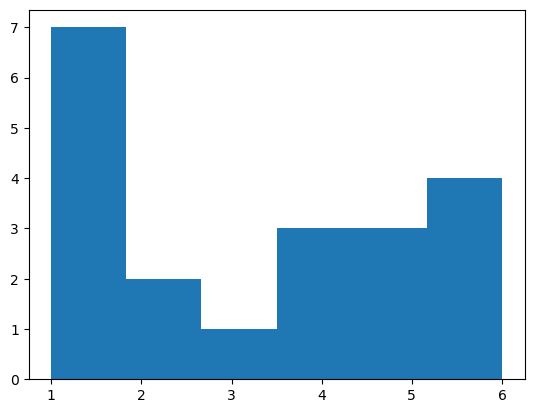

In [7]:
n = 20
x1 = (1+6*np.random.random(n)).astype(int)
#print(x1)
x,y,z=plt.hist(x1,bins=6)

Play with the number $n$, the larger it gets, the more uniform the distribution is!

Check the `numpy documentation` (in the net) to learn more about the `hist` command from `matplotlib`.

In [8]:
def dice(n=20):
    x1 = (1+6*np.random.random(n)).astype(int)
    #print(x1)
    x,y,z=plt.hist(x1,bins=6)
    return

w = dict(
n=widgets.IntSlider(min=10,max=1000,step=10,value=20,description='n'))

output = widgets.interactive_output(dice, w)
box = widgets.HBox([widgets.VBox([*w.values()]), output])
display(box)

Now we continue with different random number distribuations, namely the **uniform** and the **normal**
distribution. We first create the two different distributions and plot them. We discuss the latter 
one in more detail later.

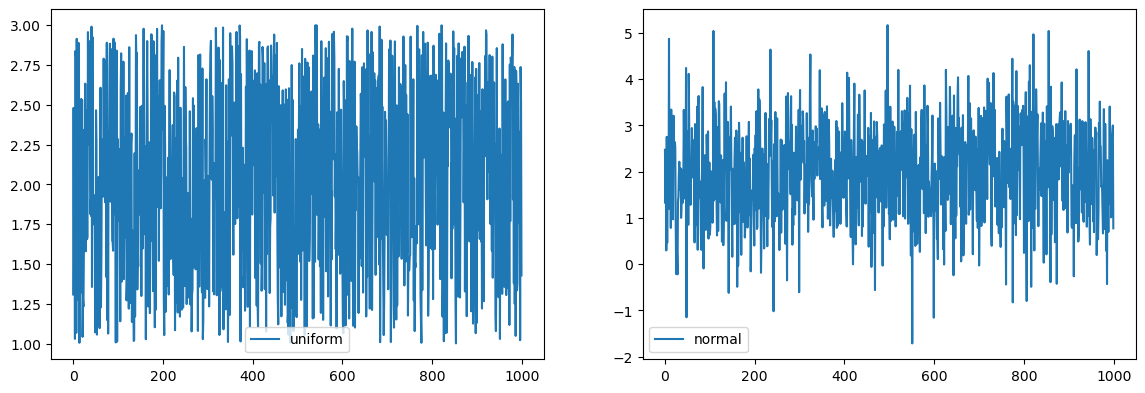

In [34]:
# set numbers drawn
n = 1000
# define a mean and a standard deviation
mu    = 2.
sigma = 1.
# call uniform random numbers
np.random.seed(12)
x1 = np.random.uniform(mu-sigma,mu+sigma,n)
# call normal random numbers
np.random.seed(12)
x2 = np.random.normal(mu,sigma,n)
#print (x2)
# plot them side by side
fig=plt.figure(figsize=(14.0,10.0))
plot1=plt.subplot2grid((2,2), (0,0), colspan=1)
plot2=plt.subplot2grid((2,2), (0,1), colspan=1,rowspan=1)
plot1.plot(x1,label='uniform')
plot2.plot(x2,label='normal')
plot1.legend()
plot2.legend()

The **uniformly** distributed data vary around the mean $\mu=2$ more or less uniformly, not exceeding the
standard deviation $\sigma=1$ used.

The **normally** distributed data also vary around the mean $\,u=2$, but are much more clustered
around this mean value. It is more likely to find a value around the mean in this distribution.

Next we look at the histograms, one by one:

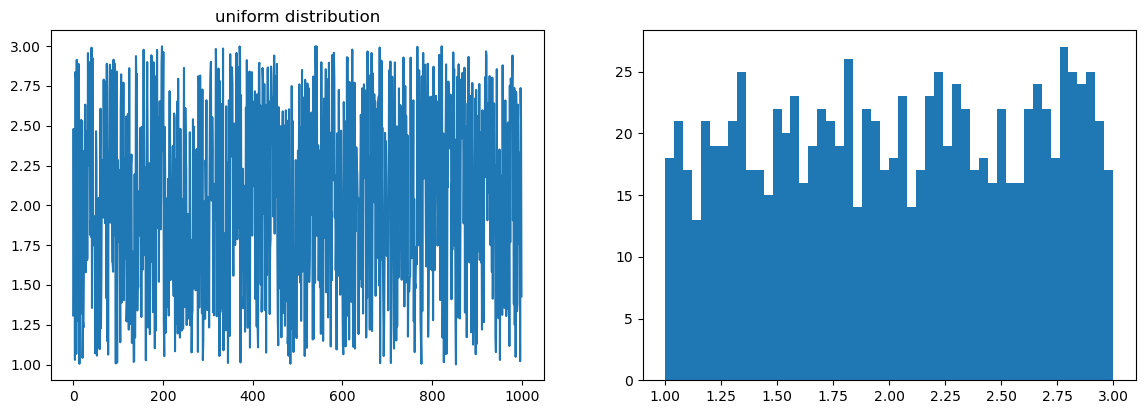

In [35]:
fig=plt.figure(figsize=(14.0,10.0))
plot1=plt.subplot2grid((2,2), (0,0), colspan=1)
plot2=plt.subplot2grid((2,2), (0,1), colspan=1,rowspan=1)
plot1.set_title('uniform distribution')
plot1.plot(x1)
x,y,z=plot2.hist(x1,bins=50)

The histogram for the **uniform** distribution is flat, indicating that all numbers within our range
are statistically equally distributed.

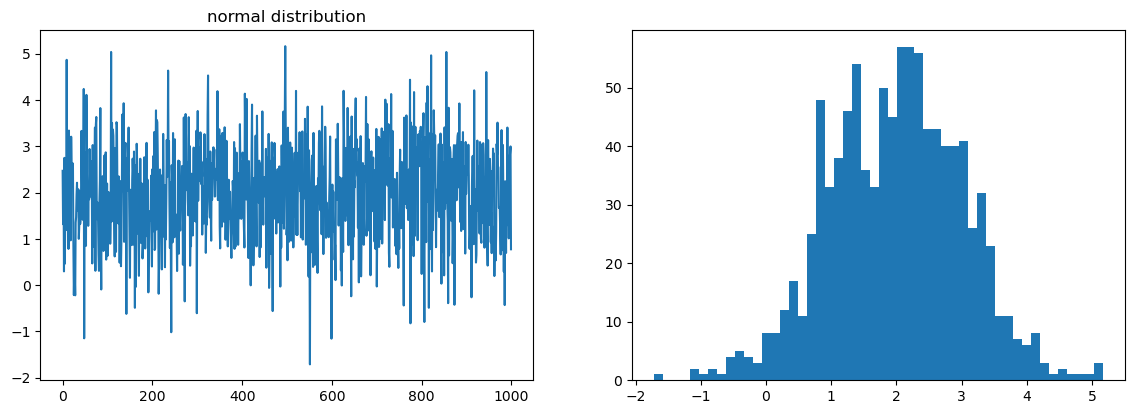

In [36]:
fig=plt.figure(figsize=(14.0,10.0))
plot1=plt.subplot2grid((2,2), (0,0), colspan=1)
plot2=plt.subplot2grid((2,2), (0,1), colspan=1,rowspan=1)
plot1.set_title('normal distribution')
plot1.plot(x2)
x,y,z=plot2.hist(x2,bins=50)

In the case of the **normal** distribution, the histogram follows an inverse exponential function.

This is the classical **Gaussian** curve, given as probability:
$$
p_i = {{1} \over {\sqrt{2\pi \sigma^2}}} e^{-{{(x_i-\mu)^2} \over {2\sigma^2}}}
$$
Plotting this probalility function on top of the histogram for the **normal** distribution proves
that the **normal** distribution follows a Gaussian curve.

Note that the need the keyword `density=True` in the `hist` command to create a normalised
probability density function.

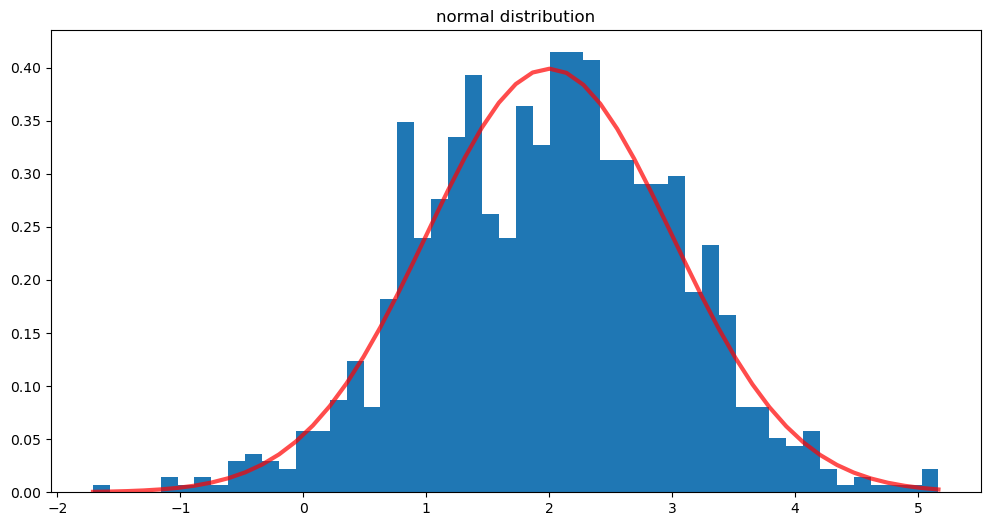

In [37]:
plt.figure(figsize=(12.0,6.0))
plt.title('normal distribution')
count, bins, ignored = plt.hist(x2,bins=50,density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2*np.pi)) * np.exp( -(bins-mu)**2 / (2*sigma**2) ),lw=3, alpha=0.7,c='r')

In the plot above, we find our standard deviation $\sigma$ as half-width. 

- Around 68.27 % of all points are within the $1 \sigma$ uncertainty.
- Around 95.45 % of all points are within the $2 \sigma$ uncertainty.
- Around 99.73 % of all points are within the $3 \sigma$ uncertainty.

We could figure this numbers out by integrating the above curve, but this is 
[another chapter ...](IceDyn_chap02_simpleintegration.ipynb)